Cell 1: Activation cell

In [1]:
import sys
from pathlib import Path
import os

PROJECT_ROOT = Path(os.getcwd()).resolve()
if PROJECT_ROOT.name == "notebooks":
    PROJECT_ROOT = PROJECT_ROOT.parent

if str(PROJECT_ROOT) not in sys.path:
    sys.path.append(str(PROJECT_ROOT))

print("Project root:", PROJECT_ROOT)

from src.train import train_model

DATA_DIR = PROJECT_ROOT / "data" / "raw" / "EuroSAT_RGB"
print("Data dir:", DATA_DIR)

model, class_names = train_model(
    data_dir=DATA_DIR,
    epochs=15,
    seed=42,
    aug_level="light",
    lr=1e-3,
    weight_decay=1e-4,
    label_smoothing=0.05,
    early_stop_patience=4,
)

Project root: C:\Users\adamc\Documents\Projects\GeoAI-LandUse-Model
Data dir: C:\Users\adamc\Documents\Projects\GeoAI-LandUse-Model\data\raw\EuroSAT_RGB
Using device: cpu


Epoch 1/15: 100%|██████████| 296/296 [07:11<00:00,  1.46s/it]


Epoch 1 | Train Loss: 1.2014 | Val Acc: 0.6938 | LR: 1.00e-03
Saved BEST model so far to C:\Users\adamc\Documents\Projects\GeoAI-LandUse-Model\models\simple_cnn_v2_best.pth (val_acc=0.6938)


Epoch 2/15: 100%|██████████| 296/296 [03:17<00:00,  1.50it/s]


Epoch 2 | Train Loss: 0.9585 | Val Acc: 0.7948 | LR: 1.00e-03
Saved BEST model so far to C:\Users\adamc\Documents\Projects\GeoAI-LandUse-Model\models\simple_cnn_v2_best.pth (val_acc=0.7948)


Epoch 3/15: 100%|██████████| 296/296 [03:45<00:00,  1.31it/s]


Epoch 3 | Train Loss: 0.8871 | Val Acc: 0.8064 | LR: 1.00e-03
Saved BEST model so far to C:\Users\adamc\Documents\Projects\GeoAI-LandUse-Model\models\simple_cnn_v2_best.pth (val_acc=0.8064)


Epoch 4/15: 100%|██████████| 296/296 [03:16<00:00,  1.51it/s]


Epoch 4 | Train Loss: 0.8299 | Val Acc: 0.8496 | LR: 1.00e-03
Saved BEST model so far to C:\Users\adamc\Documents\Projects\GeoAI-LandUse-Model\models\simple_cnn_v2_best.pth (val_acc=0.8496)


Epoch 5/15: 100%|██████████| 296/296 [03:15<00:00,  1.52it/s]


Epoch 5 | Train Loss: 0.7809 | Val Acc: 0.8002 | LR: 1.00e-03


Epoch 6/15: 100%|██████████| 296/296 [03:23<00:00,  1.46it/s]


Epoch 6 | Train Loss: 0.7397 | Val Acc: 0.8321 | LR: 1.00e-03


Epoch 7/15: 100%|██████████| 296/296 [06:10<00:00,  1.25s/it]


Epoch 7 | Train Loss: 0.7067 | Val Acc: 0.8654 | LR: 1.00e-03
Saved BEST model so far to C:\Users\adamc\Documents\Projects\GeoAI-LandUse-Model\models\simple_cnn_v2_best.pth (val_acc=0.8654)


Epoch 8/15: 100%|██████████| 296/296 [05:42<00:00,  1.16s/it]


Epoch 8 | Train Loss: 0.6834 | Val Acc: 0.8805 | LR: 1.00e-03
Saved BEST model so far to C:\Users\adamc\Documents\Projects\GeoAI-LandUse-Model\models\simple_cnn_v2_best.pth (val_acc=0.8805)


Epoch 9/15: 100%|██████████| 296/296 [05:28<00:00,  1.11s/it]


Epoch 9 | Train Loss: 0.6524 | Val Acc: 0.9225 | LR: 1.00e-03
Saved BEST model so far to C:\Users\adamc\Documents\Projects\GeoAI-LandUse-Model\models\simple_cnn_v2_best.pth (val_acc=0.9225)


Epoch 10/15: 100%|██████████| 296/296 [05:23<00:00,  1.09s/it]


Epoch 10 | Train Loss: 0.6284 | Val Acc: 0.9180 | LR: 1.00e-03


Epoch 11/15: 100%|██████████| 296/296 [05:23<00:00,  1.09s/it]


Epoch 11 | Train Loss: 0.6093 | Val Acc: 0.9183 | LR: 1.00e-03


Epoch 12/15: 100%|██████████| 296/296 [05:19<00:00,  1.08s/it]


Epoch 12 | Train Loss: 0.5865 | Val Acc: 0.8677 | LR: 1.00e-03
LR changed -> 5.00e-04


Epoch 13/15: 100%|██████████| 296/296 [09:11<00:00,  1.86s/it]  


Epoch 13 | Train Loss: 0.5374 | Val Acc: 0.9440 | LR: 5.00e-04
Saved BEST model so far to C:\Users\adamc\Documents\Projects\GeoAI-LandUse-Model\models\simple_cnn_v2_best.pth (val_acc=0.9440)


Epoch 14/15: 100%|██████████| 296/296 [02:57<00:00,  1.67it/s]


Epoch 14 | Train Loss: 0.5272 | Val Acc: 0.9383 | LR: 5.00e-04


Epoch 15/15: 100%|██████████| 296/296 [03:05<00:00,  1.60it/s]


Epoch 15 | Train Loss: 0.5161 | Val Acc: 0.9400 | LR: 5.00e-04
Done. Best Val Acc: 0.9440


Cell 2: Load saved model and run test evaluation

In [2]:
import torch
from pathlib import Path

from src.dataset import load_eurosat_dataset
from src.models import build_model
from src.eval import evaluate_model

device = "cuda" if torch.cuda.is_available() else "cpu"

# repo root from notebook
PROJECT_ROOT = Path.cwd().resolve()
if PROJECT_ROOT.name == "notebooks":
    PROJECT_ROOT = PROJECT_ROOT.parent

MODEL_PATH = PROJECT_ROOT / "models" / "simple_cnn_v2_best.pth"
print("Loading weights from:", MODEL_PATH)

# Reload loaders (same splits as before if seed is same)
train_loader, val_loader, test_loader, class_names = load_eurosat_dataset(
    data_dir=DATA_DIR,
    img_size=64,
    batch_size=64,
    seed=42,
)

# Build model
model = build_model(num_classes=len(class_names)).to(device)

# Load weights with a helpful error if mismatch happens
state = torch.load(MODEL_PATH, map_location=device)
try:
    model.load_state_dict(state)
except RuntimeError as e:
    raise RuntimeError(
        f"State dict mismatch. Did you train with a different model version?\n"
        f"Model path: {MODEL_PATH}\n"
        f"Try retraining OR make sure models.py matches the checkpoint.\n\n"
        f"Original error:\n{e}"
    )

model.eval()

test_acc, cm, report = evaluate_model(model, test_loader, class_names, device)

print("Test Accuracy:", round(test_acc, 4))
print(report)

Loading weights from: C:\Users\adamc\Documents\Projects\GeoAI-LandUse-Model\models\simple_cnn_v2_best.pth
Test Accuracy: 0.944
                      precision    recall  f1-score   support

          AnnualCrop     0.9332    0.9174    0.9252       472
              Forest     0.9841    0.9774    0.9807       442
HerbaceousVegetation     0.8814    0.9410    0.9102       458
             Highway     0.9660    0.9437    0.9547       391
          Industrial     0.9443    0.9868    0.9651       378
             Pasture     0.9470    0.8963    0.9210       299
       PermanentCrop     0.9108    0.8892    0.8999       379
         Residential     0.9954    0.9644    0.9797       450
               River     0.9049    0.9387    0.9215       375
             SeaLake     0.9777    0.9704    0.9740       406

            accuracy                         0.9440      4050
           macro avg     0.9445    0.9425    0.9432      4050
        weighted avg     0.9448    0.9440    0.9441      4050



Cell 3: Analysis

In [3]:
from pathlib import Path
from src.analysis import collect_predictions, print_worst_classes_by_recall, save_misclassified_images

device = "cuda" if torch.cuda.is_available() else "cpu"

# Collect predictions + images from the test loader
y_true, y_pred, imgs = collect_predictions(model, test_loader, device)

# Print worst classes by recall
print_worst_classes_by_recall(y_true, y_pred, class_names, top_k=5)

# Save misclassified images
out_dir = PROJECT_ROOT / "reports" / "misclassified"
save_misclassified_images(
    y_true, y_pred, imgs, class_names,
    out_dir=out_dir,
    max_per_pair=25
)



Worst 5 classes by recall:
- PermanentCrop          recall=0.889 (TP=337, FN=42)
- Pasture                recall=0.896 (TP=268, FN=31)
- AnnualCrop             recall=0.917 (TP=433, FN=39)
- River                  recall=0.939 (TP=352, FN=23)
- HerbaceousVegetation   recall=0.941 (TP=431, FN=27)
Saved misclassified images to: C:\Users\adamc\Documents\Projects\GeoAI-LandUse-Model\reports\misclassified


In [ ]:
from collections import Counter

pairs = [(class_names[t], class_names[p]) for t, p in zip(y_true, y_pred) if t != p]
top = Counter(pairs).most_common(10)

print("Top confusion pairs:")
for (tname, pname), n in top:
    print(f"{tname} -> {pname}: {n}")

Cell 4: Confusion matrix

Saved: C:\Users\adamc\Documents\Projects\GeoAI-LandUse-Model\reports\figures\confusion_matrix_v2_normalized.png


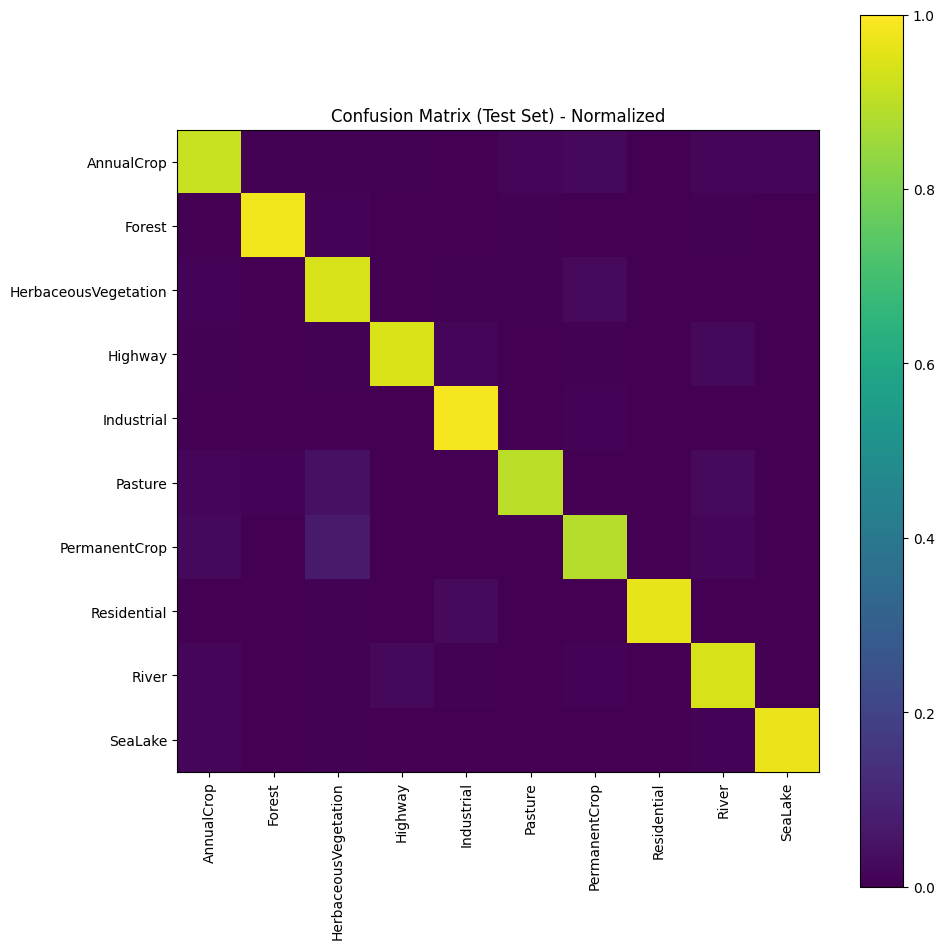

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path

fig_dir = PROJECT_ROOT / "reports" / "figures"
fig_dir.mkdir(parents=True, exist_ok=True)

cm_np = np.array(cm)

# Normalize rows (each true class sums to 1)
cm_norm = cm_np / np.maximum(cm_np.sum(axis=1, keepdims=True), 1)

plt.figure(figsize=(10, 10))
plt.imshow(cm_norm, vmin=0, vmax=1)
plt.xticks(ticks=np.arange(len(class_names)), labels=class_names, rotation=90)
plt.yticks(ticks=np.arange(len(class_names)), labels=class_names)
plt.title("Confusion Matrix (Test Set) - Normalized")
plt.colorbar()
plt.tight_layout()

out_path = fig_dir / "confusion_matrix_v2_normalized.png"
plt.savefig(out_path, dpi=200, bbox_inches="tight")
print("Saved:", out_path)

plt.show()

Cell 5: Raw Confusion Matrix

Saved: C:\Users\adamc\Documents\Projects\GeoAI-LandUse-Model\reports\figures\confusion_matrix_v2_raw.png


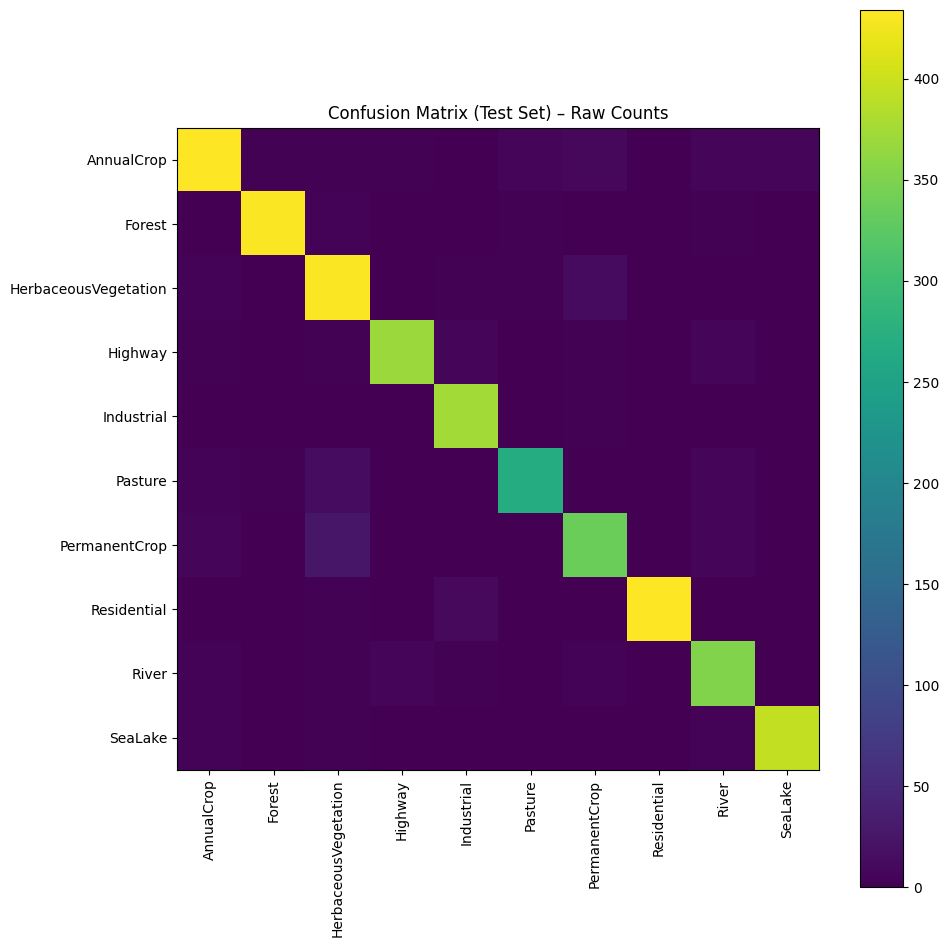

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path

fig_dir = PROJECT_ROOT / "reports" / "figures"
fig_dir.mkdir(parents=True, exist_ok=True)

cm_np = np.array(cm)

plt.figure(figsize=(10, 10))
plt.imshow(cm_np)
plt.xticks(ticks=np.arange(len(class_names)), labels=class_names, rotation=90)
plt.yticks(ticks=np.arange(len(class_names)), labels=class_names)
plt.title("Confusion Matrix (Test Set) – Raw Counts")
plt.colorbar()
plt.tight_layout()

out_path = fig_dir / "confusion_matrix_v2_raw.png"
plt.savefig(out_path, dpi=200, bbox_inches="tight")
print("Saved:", out_path)

plt.show()